<a href="https://colab.research.google.com/github/Rajeshpatra12/Agile_Workshop/blob/main/Speech_Emotion_Recognition_using_LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install keras

In [3]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

#MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#LSTM Classsifier
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

print("loaded libraries")

loaded libraries


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [12]:
## load ravdess speech data ##
ravdess_speech_labels=[] #to save extracted label/file
ravdess_speech_data=[] #to save extracted features/file
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/'):
    for filename in filenames:
        try:
            ravdess_speech_labels.append(int(filename[7:8]) - 1) # the index 7 and 8 of the file name represent the emotion label
            ravdess_speech_data.append(extract_mfcc(os.path.join(dirname, filename))) #extract MFCC features/file
        except Exception as e:
            print(f"Error processing file {filename}: {e}")
print("Finish Loading the Dataset")

Finish Loading the Dataset


In [13]:
ravdess_speech_data

[array([-6.1473914e+02,  5.6708191e+01, -2.6855345e+00,  1.0650176e+01,
         4.2408066e+00, -2.4720964e+00, -1.2035720e+01, -6.6545086e+00,
        -3.1527150e+00, -8.5261679e+00, -1.9532496e+00, -2.6058385e+00,
        -4.9945345e+00, -8.2185352e-01, -5.9731197e+00, -1.7033637e+00,
        -4.6929917e+00, -2.8690090e+00, -1.9748096e+00, -4.9853468e+00,
        -4.1624007e+00, -4.5853839e+00, -3.9446697e+00, -2.9455619e+00,
        -4.2574196e+00, -6.1298537e-01, -2.5554829e+00, -1.5733181e+00,
        -2.6173043e+00, -1.4212729e+00, -1.5479907e+00, -1.5992118e+00,
        -1.4543734e+00,  7.8825736e-01,  9.5172040e-02, -1.1480925e+00,
        -2.6098466e+00, -2.0228510e+00, -1.1394683e+00,  2.5688114e+00],
       dtype=float32),
 array([-6.1850024e+02,  6.7163063e+01,  5.2897520e+00,  1.6971664e+01,
         1.0753807e+01,  1.6424096e+00, -7.7341599e+00, -3.5962937e+00,
         7.5318038e-01, -4.4280982e+00,  4.4024751e-01,  3.9507443e-01,
        -5.0945896e-01,  2.3616443e+00, 

In [14]:
##convert data and label to array
ravdess_speech_data_array = np.array(ravdess_speech_data) #convert the image to an array
ravdess_speech_label_array = np.array(ravdess_speech_labels)
ravdess_speech_label_array.shape # gety tuple of array dimension

#make categorical labels
labels_categorical = to_categorical(ravdess_speech_label_array) #converts a class vector to binary class matrix
labels_categorical.shape

(2338, 8)

In [16]:
ravdess_speech_data_array.shape

(2338, 40)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(np.array(ravdess_speech_data_array),labels_categorical,test_size=0.2,random_state=9)

In [18]:
#split the training, validating, and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)


In [19]:
#Define the LSTM Model
def create_model_LSTM():
  model=Sequential()
  model.add(LSTM(128,return_sequences=False,input_shape=(40,1)))
  model.add(Dense(64))
  model.add(Dropout(0.5))
  model.add(Activation('relu'))
  model.add(Dense(64))
  model.add(Dropout(0.5))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))

  #Configures the model for training
  model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
  return model

In [20]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [21]:
w.shape

(1870, 40, 1)

In [22]:
#train using LSTM model
model_A = create_model_LSTM()
history=model_A.fit(w, labels_categorical[:training_samples], batch_size=16, epochs=50, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.1486 - loss: 2.0846 - val_accuracy: 0.2299 - val_loss: 2.0336
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.1741 - loss: 2.0437 - val_accuracy: 0.2246 - val_loss: 1.9819
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.2059 - loss: 2.0209 - val_accuracy: 0.2299 - val_loss: 1.9159
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2040 - loss: 1.9715 - val_accuracy: 0.3369 - val_loss: 1.8614
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2186 - loss: 1.9359 - val_accuracy: 0.2834 - val_loss: 1.8506
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2428 - loss: 1.9220 - val_accuracy: 0.3048 - val_loss: 1.8150
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.2719 - loss: 1.8977 - val_accuracy: 0.3155 - val_loss: 1.7758
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2703 - loss: 1.8656 - val_accu

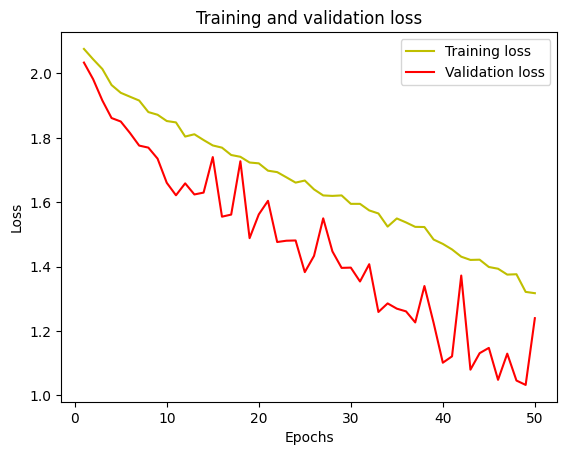

In [23]:
##loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

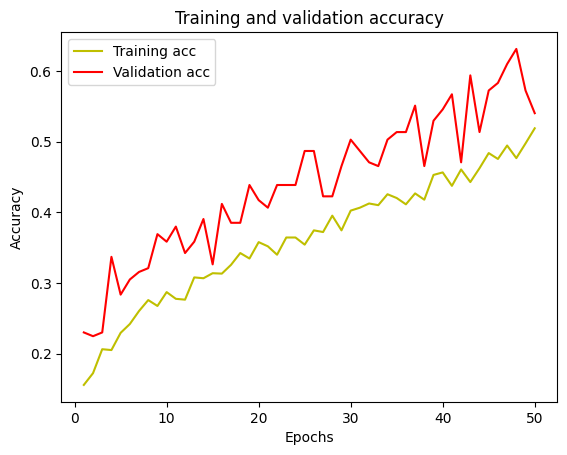

In [24]:
#accuracy plots using LSTM model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
### evaluate using model A
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples],-1), labels_categorical[training_samples:training_samples+validation_samples])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4395 - loss: 1.4450


[1.3614904880523682, 0.4721029996871948]

In [28]:
emotions={1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.expand_dims(test_point,axis=0)
  test_point=np.expand_dims(test_point,-1)
  prediction=model_A.predict(test_point)
  prediction_class=np.argmax(prediction)
  print(emotions[prediction_class+1])

In [29]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
disgust


In [30]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
sad


In [32]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
surprised


In [33]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-02-02.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
disgust


In [34]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-01-02.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
disgust


In [35]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-02-02-01-02-02.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
sad


In [36]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
angry


In [40]:
model_A.save('model_A.h5')

In [41]:
modelc=keras.models.load_model('model_A.h5')